In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

In [2]:
df=pd.read_csv('all_month.csv')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-14T02:30:08.190Z,38.814335,-122.821999,2.47,0.75,md,18.0,53.0,0.007827,0.02,...,2022-01-14T02:31:46.240Z,"7km NW of The Geysers, CA",earthquake,0.24,0.73,0.22,3.0,automatic,nc,nc
1,2022-01-14T02:25:14.630Z,33.823833,-118.284833,8.91,1.52,ml,21.0,64.0,0.059360,0.24,...,2022-01-14T02:29:09.803Z,"1km SSW of Carson, CA",earthquake,0.43,0.86,0.17,29.0,automatic,ci,ci
2,2022-01-14T02:24:29.520Z,40.027000,-123.747002,15.45,2.52,md,18.0,112.0,0.142900,0.13,...,2022-01-14T02:26:10.867Z,"12km SSE of Redway, CA",earthquake,0.55,0.69,0.10,15.0,automatic,nc,nc
3,2022-01-14T02:20:31.850Z,38.824165,-122.804169,2.52,0.69,md,18.0,63.0,0.004676,0.01,...,2022-01-14T02:22:06.564Z,"7km NW of The Geysers, CA",earthquake,0.23,0.59,0.48,3.0,automatic,nc,nc
4,2022-01-14T02:19:10.470Z,40.854500,-122.376335,4.36,1.45,md,6.0,310.0,0.256700,0.09,...,2022-01-14T02:27:10.172Z,"19km N of Shasta Lake, CA",earthquake,8.02,10.34,0.18,5.0,automatic,nc,nc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9177 entries, 0 to 9176
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9177 non-null   object 
 1   latitude         9177 non-null   float64
 2   longitude        9177 non-null   float64
 3   depth            9177 non-null   float64
 4   mag              9174 non-null   float64
 5   magType          9174 non-null   object 
 6   nst              6681 non-null   float64
 7   gap              7664 non-null   float64
 8   dmin             6288 non-null   float64
 9   rms              9176 non-null   float64
 10  net              9177 non-null   object 
 11  id               9177 non-null   object 
 12  updated          9177 non-null   object 
 13  place            9177 non-null   object 
 14  type             9177 non-null   object 
 15  horizontalError  6842 non-null   float64
 16  depthError       9177 non-null   float64
 17  magError      

In [5]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9177.000000,9177.000000,9177.000000,9174.000000,6681.000000,7664.000000,6288.000000,9176.000000,6842.000000,9177.000000,7256.000000,7658.000000
mean,36.865970,-113.913517,22.029584,1.676264,21.304894,116.585848,0.589837,0.267418,1.541829,4.739397,0.310691,14.702403
std,18.590110,61.851292,48.844244,1.214435,15.746894,61.272033,2.078702,0.293466,2.843430,154.720524,0.596184,26.857385
min,-65.361900,-179.984800,-3.470000,-1.310000,2.000000,10.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.376833,-150.393400,3.470000,0.870000,10.000000,71.000000,0.021820,0.090000,0.280000,0.460000,0.108000,4.000000
50%,38.164000,-121.545500,8.790000,1.440000,17.000000,104.000000,0.063550,0.150000,0.470000,0.760000,0.164000,8.000000
75%,44.629333,-116.436833,20.140000,2.100000,28.000000,151.000000,0.159775,0.360000,0.850000,1.600000,0.250000,16.000000
max,85.292300,179.886400,653.870000,7.300000,162.000000,350.000000,39.390000,7.060000,29.160000,11327.700000,5.500000,619.000000


# preprocessing

In [7]:
pd.read_csv('all_month.csv',index_col='id')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
id,,,,,,,,,,,,,,,,,,,,,
nc73678176,2022-01-14T02:30:08.190Z,38.814335,-122.821999,2.47,0.75,md,18.0,53.0,0.007827,0.02,...,2022-01-14T02:31:46.240Z,"7km NW of The Geysers, CA",earthquake,0.24,0.73,0.220000,3.0,automatic,nc,nc
ci39912023,2022-01-14T02:25:14.630Z,33.823833,-118.284833,8.91,1.52,ml,21.0,64.0,0.059360,0.24,...,2022-01-14T02:29:09.803Z,"1km SSW of Carson, CA",earthquake,0.43,0.86,0.170000,29.0,automatic,ci,ci
nc73678171,2022-01-14T02:24:29.520Z,40.027000,-123.747002,15.45,2.52,md,18.0,112.0,0.142900,0.13,...,2022-01-14T02:26:10.867Z,"12km SSE of Redway, CA",earthquake,0.55,0.69,0.100000,15.0,automatic,nc,nc
nc73678166,2022-01-14T02:20:31.850Z,38.824165,-122.804169,2.52,0.69,md,18.0,63.0,0.004676,0.01,...,2022-01-14T02:22:06.564Z,"7km NW of The Geysers, CA",earthquake,0.23,0.59,0.480000,3.0,automatic,nc,nc
nc73678161,2022-01-14T02:19:10.470Z,40.854500,-122.376335,4.36,1.45,md,6.0,310.0,0.256700,0.09,...,2022-01-14T02:27:10.172Z,"19km N of Shasta Lake, CA",earthquake,8.02,10.34,0.180000,5.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
us6000gcbi,2021-12-15T02:46:59.688Z,44.290400,-115.124800,10.00,2.50,ml,NaN,47.0,1.012000,0.68,...,2022-01-13T02:50:50.040Z,"16 km WNW of Stanley, Idaho",earthquake,1.80,2.00,0.050000,52.0,reviewed,us,us
us6000gduh,2021-12-15T02:44:20.943Z,2.798000,128.212800,124.53,4.30,mb,NaN,124.0,2.183000,0.29,...,2022-01-13T02:49:51.040Z,"120 km N of Tobelo, Indonesia",earthquake,7.90,10.10,0.148000,13.0,reviewed,us,us
nc73663841,2021-12-15T02:41:28.820Z,39.104167,-123.572000,2.36,1.24,md,12.0,104.0,0.064290,0.08,...,2021-12-15T20:35:15.209Z,"20km ESE of Navarro Head, CA",earthquake,0.33,1.43,0.088000,9.0,reviewed,nc,nc


# null value checking

In [8]:
df.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   3
magType               3
nst                2496
gap                1513
dmin               2889
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2335
depthError            0
magError           1921
magNst             1519
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [10]:
for i in['mag','nst','gap','dmin','rms','magError','horizontalError']:
    df[i]=df[i].fillna(df[i].median())

In [11]:
df['magType'].fillna('ml',inplace=True)

In [12]:
df=df.drop(['magNst'],axis=1)

In [13]:
df.isna().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
status             0
locationSource     0
magSource          0
dtype: int64

# feature selection

In [14]:
import re
df['short place']=[re.findall(r'\w+',i)[-1] for i in df['place']]
features=[i for i in df.columns if df[i].isna().sum()==0]
features
for i in['mag','place','time','updated','net','magType','depth']:
    features.remove(i)

# seperate categorical data

In [17]:
categorical=[]
for i in features:
    if df[i].dtype=="object":
     categorical.append(i)
categorical    

['id', 'type', 'status', 'locationSource', 'magSource', 'short place']

# encoding

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x=df[features]
y=df[['mag','depth', 'depthError']]
for i in categorical:
 x[i]=le.fit_transform(x[i])
for i in [i for i in y.columns if y[i].dtype=='object']:
 y[i]=le.fit_transform(y[i])


<ipython-input-18-21311af3063f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=le.fit_transform(x[i])


# exploratory data analytics

Text(0.5, 0, 'magType')

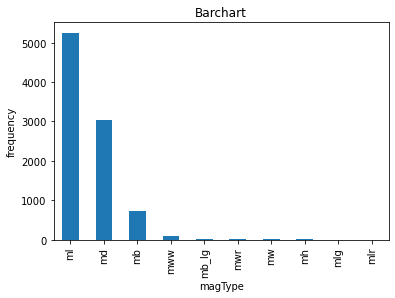

In [19]:
dd=df['magType'].value_counts()
dd.plot(kind='bar')
plt.title('Barchart')
plt.ylabel('frequency')
plt.xlabel('magType')

most of the earthquakes are ml type.

In [20]:
dg=df['type'].value_counts()
dg

earthquake      9037
quarry blast      89
explosion         29
ice quake         19
other event        2
sonic boom         1
Name: type, dtype: int64

Text(0.5, 0, 'type')

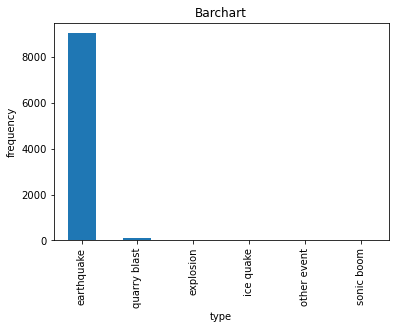

In [21]:
dg.plot(kind='bar')
plt.title('Barchart')
plt.ylabel('frequency')
plt.xlabel('type')

Most of the earthquake is natural,while there is some earthquake due to quarry blast
and explosion.

In [22]:
ml=df.nlargest(20,['mag'])
ml

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,status,locationSource,magSource,short place
4659,2021-12-29T18:25:51.500Z,-7.5441,127.5749,160.81,7.3,mww,17.0,19.0,3.7150,1.04,...,2022-01-10T19:21:32.438Z,"125 km NNE of Lospalos, Timor Leste",earthquake,6.10,2.50,0.052,reviewed,us,us,Leste
994,2022-01-11T11:35:46.156Z,52.6563,-167.9169,22.32,6.8,mww,17.0,52.0,0.7550,0.84,...,2022-01-13T11:45:47.448Z,"71 km ESE of Nikolski, Alaska",earthquake,5.40,3.90,0.051,reviewed,us,us,Alaska
976,2022-01-11T12:39:31.515Z,52.6047,-168.1550,11.23,6.6,mww,17.0,40.0,0.8200,0.70,...,2022-01-12T12:47:32.568Z,"60 km SE of Nikolski, Alaska",earthquake,2.50,3.30,0.058,reviewed,us,us,Alaska
1154,2022-01-11T01:07:47.981Z,35.1456,31.9095,19.60,6.6,mww,17.0,21.0,1.1800,1.39,...,2022-01-14T01:22:45.942Z,"48 km WNW of Pólis, Cyprus",earthquake,4.90,3.70,0.045,reviewed,us,us,Cyprus
2140,2022-01-07T17:45:30.751Z,37.8152,101.2775,13.00,6.6,mww,17.0,12.0,10.1440,0.69,...,2022-01-14T00:47:16.832Z,"110 km SW of Jinchang, China",earthquake,7.30,1.70,0.080,reviewed,us,us,China
1483,2022-01-10T00:06:31.232Z,-33.7964,179.5534,10.00,6.2,mww,17.0,34.0,5.0080,1.36,...,2022-01-11T00:11:28.282Z,south of the Kermadec Islands,earthquake,8.60,1.80,0.042,reviewed,us,us,Islands
3455,2022-01-03T09:46:36.794Z,23.9968,122.2352,28.71,6.2,mww,17.0,67.0,0.6110,0.73,...,2022-01-08T04:37:31.775Z,"64 km E of Hualien City, Taiwan",earthquake,3.60,4.00,0.048,reviewed,us,us,Taiwan
7213,2021-12-20T20:10:19.100Z,40.3140,-124.7270,14.85,6.2,mw,118.0,224.0,0.2951,0.22,...,2022-01-12T19:59:01.929Z,"38km W of Petrolia, CA",earthquake,0.76,0.62,0.164,reviewed,nc,nc,CA
7560,2021-12-19T16:28:22.712Z,-16.2662,178.5788,10.00,6.2,mww,17.0,45.0,1.5540,0.65,...,2022-01-03T20:30:52.645Z,"85 km WNW of Labasa, Fiji",earthquake,7.30,1.50,0.041,reviewed,us,us,Fiji
2507,2022-01-06T16:25:07.349Z,11.9587,-87.1472,26.87,6.1,mww,17.0,53.0,0.7160,1.14,...,2022-01-12T02:23:46.320Z,"58 km S of Corinto, Nicaragua",earthquake,4.80,2.90,0.034,reviewed,us,us,Nicaragua


In [23]:
ms=df.nsmallest(20,['mag'])
ms

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,status,locationSource,magSource,short place
4484,2021-12-30T12:33:09.160Z,60.015000,-153.056000,0.90,-1.31,ml,5.0,102.0,0.06355,0.29,...,2021-12-31T00:38:00.890Z,"64 km ENE of Pedro Bay, Alaska",earthquake,0.75,2.41,0.137324,reviewed,av,av,Alaska
2439,2022-01-06T21:39:50.260Z,60.465167,-152.754167,-0.16,-1.20,ml,5.0,105.0,0.06355,0.19,...,2022-01-07T07:42:59.110Z,"75 km NW of Ninilchik, Alaska",earthquake,0.43,0.88,0.171126,reviewed,av,av,Alaska
7825,2021-12-18T22:57:03.465Z,60.576400,-152.404400,0.00,-1.20,ml,17.0,104.0,0.06355,1.15,...,2021-12-19T01:23:28.214Z,"59 km W of Salamatof, Alaska",earthquake,0.47,0.00,0.164000,reviewed,ak,ak,Alaska
8289,2021-12-17T14:04:23.420Z,60.018000,-153.067167,-2.44,-1.09,ml,5.0,91.0,0.06355,0.09,...,2021-12-18T07:29:53.170Z,"63 km ENE of Pedro Bay, Alaska",earthquake,0.27,1.78,0.244859,reviewed,av,av,Alaska
3766,2022-01-02T03:45:49.520Z,60.008667,-153.122500,-2.02,-1.08,ml,4.0,189.0,0.06355,0.10,...,2022-01-05T22:04:53.250Z,"60 km ENE of Pedro Bay, Alaska",earthquake,0.53,3.96,0.197395,reviewed,av,av,Alaska
1853,2022-01-08T15:22:48.750Z,44.678667,-110.058833,11.51,-1.07,md,6.0,120.0,0.11110,0.13,...,2022-01-10T16:31:23.640Z,"36 km S of Silver Gate, Montana",earthquake,1.35,2.19,0.407000,reviewed,uu,uu,Montana
8135,2021-12-18T00:34:24.660Z,59.995000,-153.102667,-0.67,-1.06,ml,5.0,105.0,0.06355,0.07,...,2021-12-20T20:12:50.660Z,"60 km ENE of Pedro Bay, Alaska",earthquake,0.55,4.41,0.088161,reviewed,av,av,Alaska
4104,2021-12-31T21:42:57.480Z,60.049333,-153.124167,7.16,-1.02,ml,5.0,135.0,0.06355,0.28,...,2022-01-03T18:51:43.160Z,"62 km ENE of Pedro Bay, Alaska",earthquake,2.70,3.13,0.152647,reviewed,av,av,Alaska
4165,2021-12-31T16:44:58.660Z,60.004333,-153.122667,-2.87,-0.99,ml,4.0,183.0,0.06355,0.12,...,2022-01-03T18:43:04.200Z,"60 km ENE of Pedro Bay, Alaska",earthquake,0.80,3.14,0.130073,reviewed,av,av,Alaska
7884,2021-12-18T18:55:03.780Z,59.991167,-153.101833,3.31,-0.98,ml,4.0,97.0,0.06355,0.20,...,2021-12-21T07:37:51.110Z,"60 km ENE of Pedro Bay, Alaska",earthquake,0.79,1.79,0.049840,reviewed,av,av,Alaska


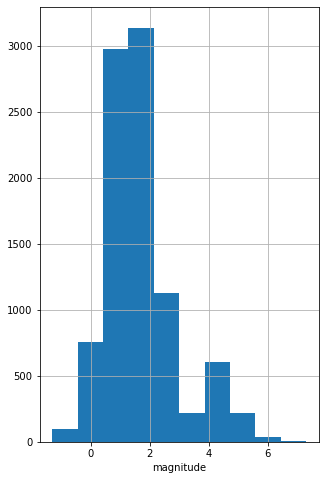

In [24]:
freqgraph=df['mag']
freqgraph.hist(figsize=(5,8))
plt.xlabel('magnitude')
plt.show()


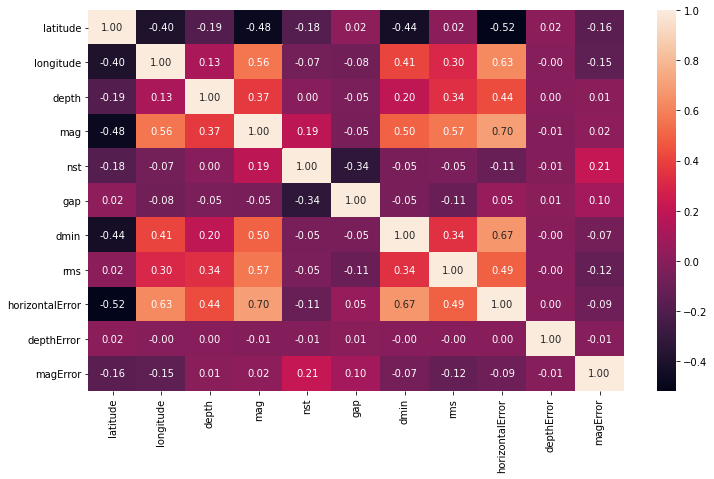

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(),cmap='rocket',annot=True,fmt='.2f')
plt.show()


Strong correlations can be spotted for horrizontal error against magnitude,dmin and
rms

Text(0.5, 1.0, 'msg v/s depth')

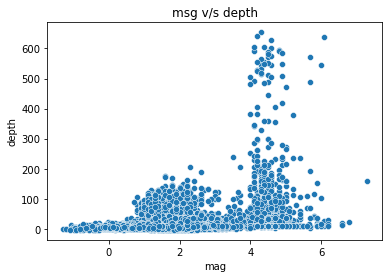

In [29]:
sns.scatterplot(x='mag',y='depth',data=df)
plt.title("msg v/s depth")

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.predict(x_test)


array([[ 1.21710284,  0.56620701,  2.2       ],
       [ 5.07035516, 95.1448536 ,  6.7       ],
       [ 0.78628744,  5.0027361 ,  0.45      ],
       ...,
       [ 1.55821488,  2.1282574 ,  0.2       ],
       [ 2.64160856, 14.38800405,  0.48      ],
       [ 3.7293995 , 20.20130475,  8.4       ]])

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
clf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
clf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred=clf.predict(x_test)
y_pred

array([[  1.472 ,   8.451 ,   2.161 ],
       [  4.433 , 135.9484,   7.181 ],
       [  0.6964,   1.1938,   0.5652],
       ...,
       [  1.6151,   1.7661,   0.2044],
       [  1.7676,   6.5959,   0.4931],
       [  4.3103,  65.2664,   8.7304]])

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtmodel=DecisionTreeRegressor()
dtmodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
dtmodel.predict(x_test)

array([[  1.2 ,   8.6 ,   2.  ],
       [  4.  , 132.42,   5.2 ],
       [  1.14,   0.74,   0.57],
       ...,
       [  1.63,   3.45,   0.24],
       [  1.95,   4.67,   0.49],
       [  4.4 , 185.38,  10.3 ]])

In [42]:
from sklearn.multioutput import MultiOutputRegressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel=KNeighborsRegressor()
knnmodel=MultiOutputRegressor(knnmodel)
knnmodel.fit(x_train,y_train)

MultiOutputRegressor(estimator=KNeighborsRegressor())

In [44]:
knnmodel.predict(x_test)

array([[ 0.98 ,  9.14 ,  2.48 ],
       [ 4.52 , 35.704,  4.12 ],
       [ 0.844,  2.196,  1.412],
       ...,
       [ 1.538,  2.582,  0.248],
       [ 1.81 , 10.586,  0.394],
       [ 4.56 , 23.622,  2.78 ]])

In [45]:
from sklearn.svm import LinearSVR
svm_linear=LinearSVR()
svm_linear=MultiOutputRegressor(svm_linear)
svm_linear.fit(x_train,y_train)

C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


MultiOutputRegressor(estimator=LinearSVR())

In [46]:
svm_linear.predict(x_test)

array([[  1.64533987, -10.05513004,   2.20256937],
       [  4.17966455,  37.6454471 ,   6.70366534],
       [  1.01641658,  -0.62348196,   0.45214686],
       ...,
       [  1.93869383,   7.47612607,   0.2023156 ],
       [  3.73328806,  22.07793379,   0.48116378],
       [  1.84863138, -15.23912034,   8.40294809]])

# model tuning

In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, x, y, cv=5).mean())
print(cross_val_score(clf, x, y, cv=5).mean())
print(cross_val_score(dtmodel, x, y, cv=5).mean())
print(cross_val_score(knnmodel, x, y, cv=5).mean())
print(cross_val_score(svm_linear, x, y, cv=5).mean())

0.6556576505582725
0.7952252534065585
0.6761230705268445
0.3454851891826874


C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\look at me\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

0.22169059217709502


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10],
'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]
grid_search_forest = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_s
grid_search_forest.fit(x_train, y_train)

SyntaxError: EOL while scanning string literal (<ipython-input-48-0468cf755126>, line 6)

In [ ]:
print(cross_val_score(grid_search_forest.best_estimator_, x, y, cv=5).mean())

Since the cross validation value is more for random forest regressor, it is the best
regressor.

group 1:Anju C K,Gayathri,Athul Parameswaran,Abin Mathwes,Aneete Rose